In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Navdeep21582009/Databases-and-Analytics-CS-10-FEB-25---06-JUN-25-CP6CS56E_A_SEM2_202425/refs/heads/main/bookstore_transactions.csv'
bookstore_df = pd.read_csv(url,index_col=0)
print(bookstore_df.head(5))
# Display the first few rows and info to verify import
print("First 5 rows of the bookstore dataset:")
print(bookstore_df.head())
print("\nDataset Info:")
bookstore_df.info()

               Customer ID            Book Title          Author      Genre  \
Transaction ID                                                                
59b278fe            914e0b                  1984   George Orwell  Dystopian   
8f90d6f6            c8d80d              Becoming  Michelle Obama  Biography   
a116662e            dba9d8  The Midnight Library       Matt Haig    Fantasy   
2db9cc65            7cdf6c                  Dune   Frank Herbert     Sci-Fi   
d99cc2d4            eb00af                  Dune   Frank Herbert     Sci-Fi   

               Purchase Method  Payment Method  Stock Before  Stock After  \
Transaction ID                                                              
59b278fe                Online            Cash            25           22   
8f90d6f6                Online  Online Payment            14           12   
a116662e                Online            Cash            21           18   
2db9cc65                Online            Cash            26 

In [4]:
# Verify data integrity (for a single file, this mainly involves checking for duplicates)
initial_rows = len(bookstore_df)
duplicates_in_single_file = bookstore_df.duplicated().sum()
print(f"\nInitial rows in bookstore_df: {initial_rows}")
print(f"Number of duplicate rows found: {duplicates_in_single_file}")


Initial rows in bookstore_df: 3500
Number of duplicate rows found: 125


In [5]:
if duplicates_in_single_file > 0:
    bookstore_df_no_duplicates = bookstore_df.drop_duplicates()
    print(f"Rows after dropping duplicates: {len(bookstore_df_no_duplicates)}")
    # Decide whether to use the de-duplicated dataframe for further analysis
    # For this exercise, we'll proceed with the original if duplicates are few,
    # or the de-duplicated one if significant. Let's assume we use the original for now
    # unless instructed otherwise or if duplicates are problematic.
    # bookstore_df = bookstore_df_no_duplicates # Uncomment to use de-duplicated df
else:
    print("No duplicate rows found in the initial dataset.")

Rows after dropping duplicates: 3375


In [6]:
print("\n--- Missing Data Handling ---")
print("Missing values per column before handling:")
print(bookstore_df.isnull().sum())

# Handle missing data in 'Promotion Applied'
# Strategy: Fill NaN with "None" as it implies no promotion was applied.
bookstore_df['Promotion Applied'].fillna("None", inplace=True)

print("\nMissing values per column after handling 'Promotion Applied':")
print(bookstore_df.isnull().sum())


print("\n--- Descriptive Statistics ---")
# Select numerical columns for statistics
numerical_cols = ['Stock Before', 'Stock After', 'Loyalty Points', 'Discount Applied']
numerical_df = bookstore_df[numerical_cols]

print("\nDescriptive statistics for numerical columns (Pandas .describe()):")
print(numerical_df.describe())


--- Missing Data Handling ---
Missing values per column before handling:
Customer ID             0
Book Title              0
Author                  0
Genre                   0
Purchase Method         0
Payment Method          0
Stock Before            0
Stock After             0
Loyalty Points          0
Promotion Applied    1575
Discount Applied        0
Order Status            0
Restock Triggered       0
dtype: int64

Missing values per column after handling 'Promotion Applied':
Customer ID          0
Book Title           0
Author               0
Genre                0
Purchase Method      0
Payment Method       0
Stock Before         0
Stock After          0
Loyalty Points       0
Promotion Applied    0
Discount Applied     0
Order Status         0
Restock Triggered    0
dtype: int64

--- Descriptive Statistics ---

Descriptive statistics for numerical columns (Pandas .describe()):
       Stock Before  Stock After  Loyalty Points  Discount Applied
count   3500.000000  3500.000000 

<ipython-input-6-05f8b815f035>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bookstore_df['Promotion Applied'].fillna("None", inplace=True)


In [7]:
# Individual statistics using Pandas
print("\nIndividual statistics using Pandas:")
print(f"Mean Loyalty Points: {bookstore_df['Loyalty Points'].mean():.2f}")
print(f"Median Loyalty Points: {bookstore_df['Loyalty Points'].median():.2f}")
print(f"Standard Deviation of Loyalty Points: {bookstore_df['Loyalty Points'].std():.2f}")
print(f"Minimum Stock Before: {bookstore_df['Stock Before'].min()}")
print(f"Maximum Stock Before: {bookstore_df['Stock Before'].max()}")
print(f"Mean Discount Applied: {bookstore_df['Discount Applied'].mean():.2f}")


# Quantiles using Pandas
print("\nQuantiles for 'Stock After' (Pandas):")
print(bookstore_df['Stock After'].quantile([0.25, 0.5, 0.75]))


Individual statistics using Pandas:
Mean Loyalty Points: 13.63
Median Loyalty Points: 10.00
Standard Deviation of Loyalty Points: 11.38
Minimum Stock Before: 5
Maximum Stock Before: 50
Mean Discount Applied: 6.61

Quantiles for 'Stock After' (Pandas):
0.25    14.0
0.50    26.0
0.75    37.0
Name: Stock After, dtype: float64



Statistics for Loyalty Points using NumPy:
Mean (NumPy): 13.63
Median (NumPy): 10.00
Standard Deviation (NumPy): 11.38
Minimum (NumPy): 0
Maximum (NumPy): 30
25th Percentile (NumPy): 0.0
75th Percentile (NumPy): 20.0

Statistics for Discount Applied using NumPy:
Mean Discount (NumPy): 6.61
Max Discount (NumPy): 50

--- Creating Plots for Numerical Features ---


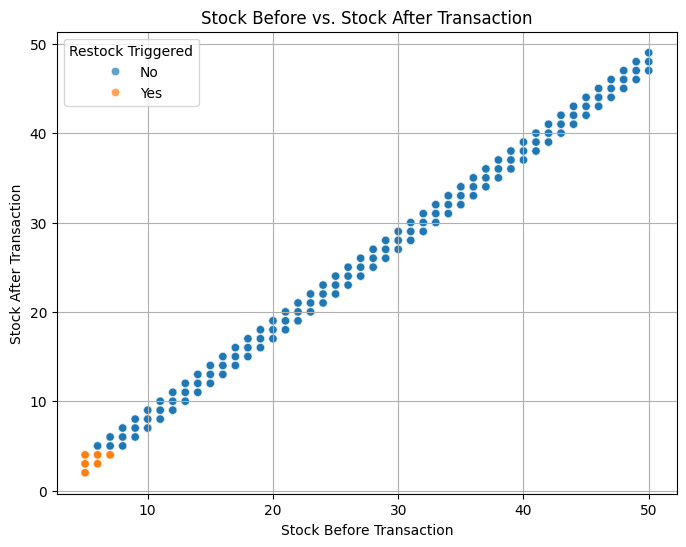

In [8]:
# Using NumPy for statistics
# Convert a Pandas Series/column to a NumPy array first
loyalty_points_np = bookstore_df['Loyalty Points'].to_numpy()
discount_applied_np = bookstore_df['Discount Applied'].to_numpy()

print("\nStatistics for Loyalty Points using NumPy:")
print(f"Mean (NumPy): {np.mean(loyalty_points_np):.2f}")
print(f"Median (NumPy): {np.median(loyalty_points_np):.2f}")
print(f"Standard Deviation (NumPy): {np.std(loyalty_points_np):.2f}")
print(f"Minimum (NumPy): {np.min(loyalty_points_np)}")
print(f"Maximum (NumPy): {np.max(loyalty_points_np)}")
print(f"25th Percentile (NumPy): {np.percentile(loyalty_points_np, 25)}")
print(f"75th Percentile (NumPy): {np.percentile(loyalty_points_np, 75)}")

print("\nStatistics for Discount Applied using NumPy:")
print(f"Mean Discount (NumPy): {np.mean(discount_applied_np):.2f}")
print(f"Max Discount (NumPy): {np.max(discount_applied_np)}")


# --- Creating Plots for Numerical Features: (3 Marks) ---
print("\n--- Creating Plots for Numerical Features ---")

# 1. Scatter Plot: Stock Before vs. Stock After
plt.figure(figsize=(8, 6))
sns.scatterplot(data=bookstore_df, x='Stock Before', y='Stock After', hue='Restock Triggered', alpha=0.7)
plt.title('Stock Before vs. Stock After Transaction')
plt.xlabel('Stock Before Transaction')
plt.ylabel('Stock After Transaction')
plt.grid(True)
plt.show()


Pair Plot of Numerical Features:


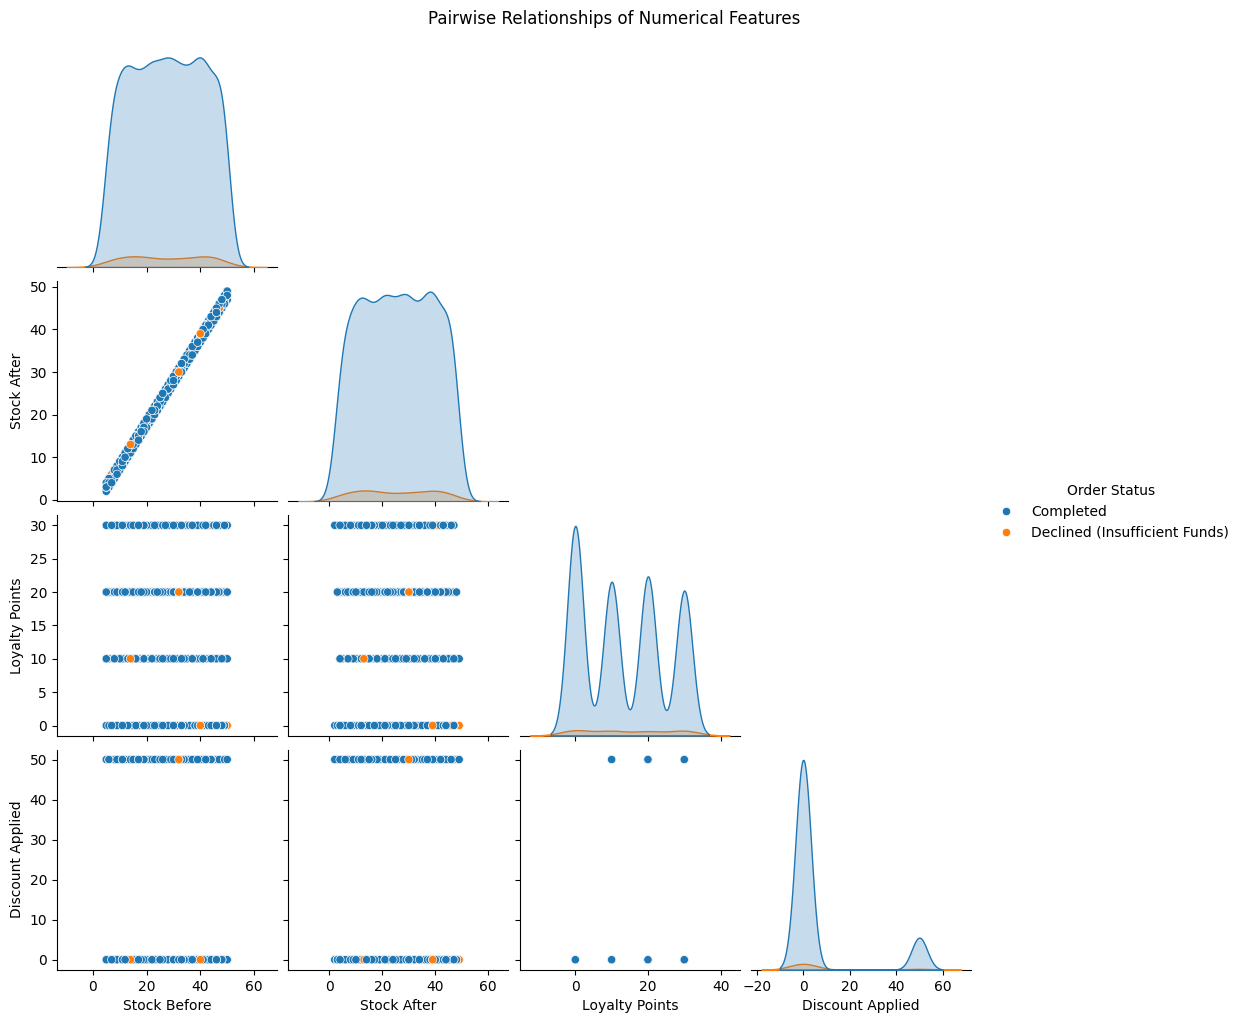

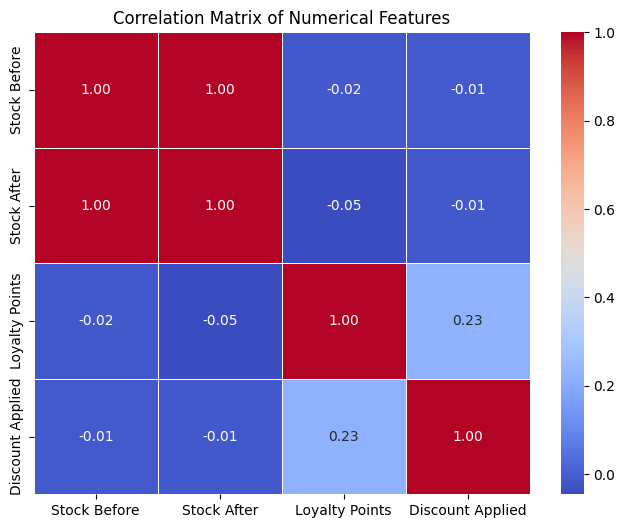

In [9]:
# 2. Pair Plot for numerical features (using Seaborn)
print("\nPair Plot of Numerical Features:")
# Using a subset of columns for pairplot if too many, or if some are less relevant for pairwise scatter
pairplot_cols = ['Stock Before', 'Stock After', 'Loyalty Points', 'Discount Applied']
# Adding 'Order Status' as hue if it has a manageable number of unique values
if bookstore_df['Order Status'].nunique() < 10:
    pair_plot_obj = sns.pairplot(bookstore_df[pairplot_cols + ['Order Status']], hue='Order Status', diag_kind='kde', corner=True)
else:
    pair_plot_obj = sns.pairplot(bookstore_df[pairplot_cols], diag_kind='kde', corner=True)
pair_plot_obj.fig.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
plt.show()

# 3. Correlation Matrix Heatmap
plt.figure(figsize=(8, 6))
# Ensure only numerical columns are used for correlation
correlation_matrix = bookstore_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

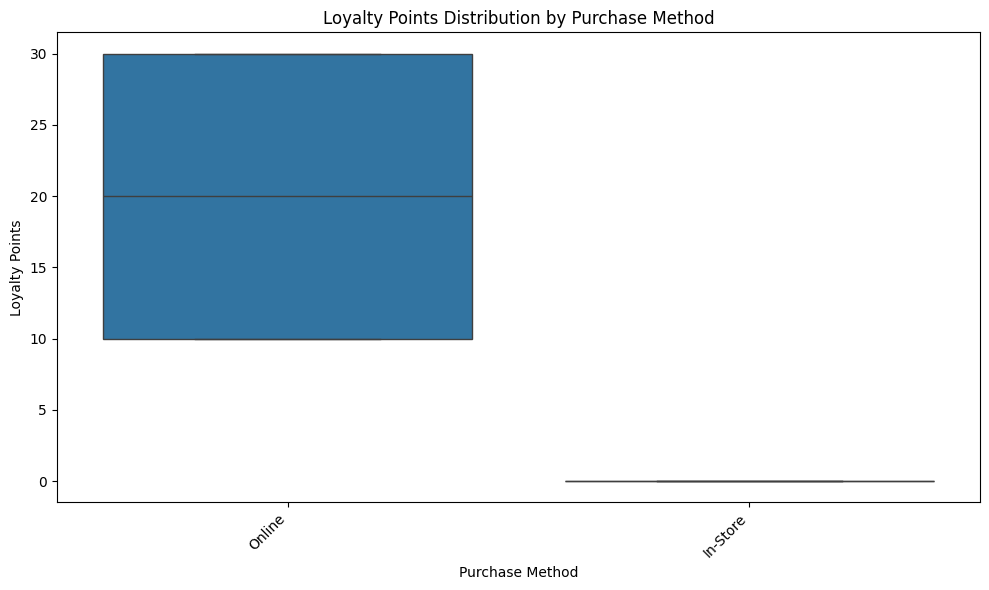

<ipython-input-10-02139b3e121b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bookstore_df, y='Genre', order = bookstore_df['Genre'].value_counts().index, palette='viridis')


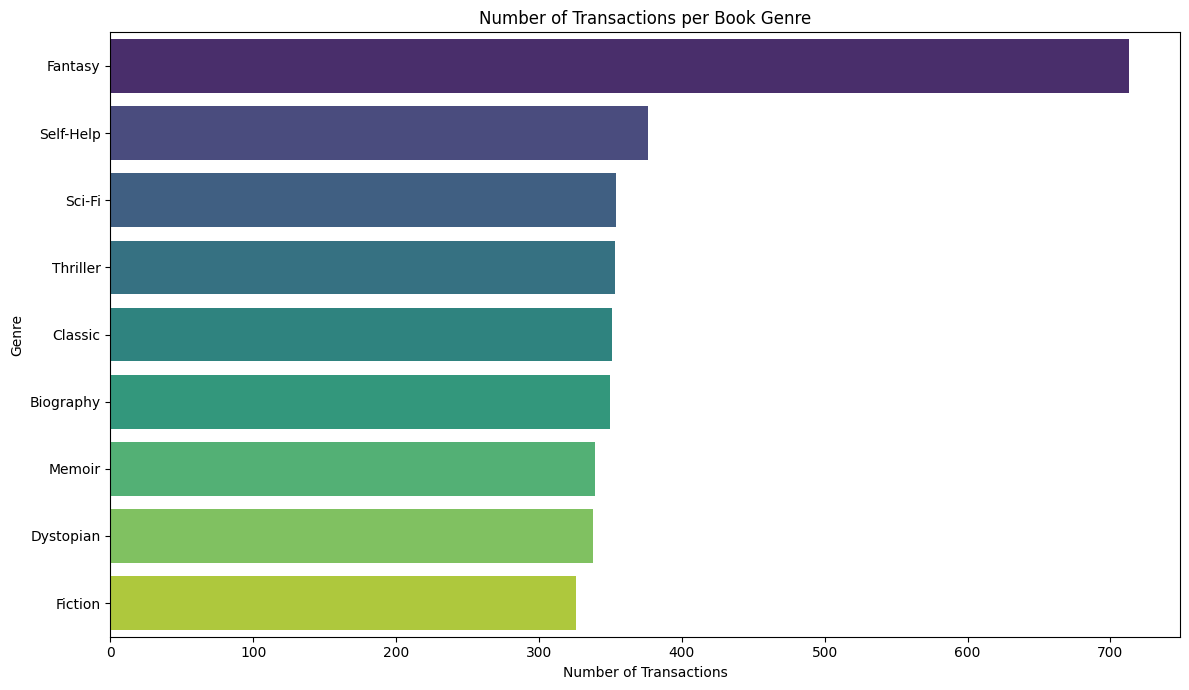


--- End of Section 2 Python Code ---


In [10]:
# Additional Plot Example: Box plot for 'Loyalty Points' by 'Purchase Method'
plt.figure(figsize=(10, 6))
sns.boxplot(data=bookstore_df, x='Purchase Method', y='Loyalty Points')
plt.title('Loyalty Points Distribution by Purchase Method')
plt.xlabel('Purchase Method')
plt.ylabel('Loyalty Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Additional Plot Example: Count plot for 'Genre'
plt.figure(figsize=(12, 7))
sns.countplot(data=bookstore_df, y='Genre', order = bookstore_df['Genre'].value_counts().index, palette='viridis')
plt.title('Number of Transactions per Book Genre')
plt.xlabel('Number of Transactions')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

print("\n--- End of Section 2 Python Code ---")